In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Mobile_Brands.csv')

In [3]:
data.head()

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000


In [4]:
data.shape

(3114, 12)

In [5]:
data.columns

Index(['Brands', 'Models', 'Colors', 'Memory', 'Storage', 'Camera', 'Rating',
       'Selling Price', 'Original Price', 'Mobile', 'Discount',
       'discount percentage'],
      dtype='object')

In [6]:
data.dtypes

Brands                  object
Models                  object
Colors                  object
Memory                  object
Storage                 object
Camera                  object
Rating                 float64
Selling Price            int64
Original Price           int64
Mobile                  object
Discount                 int64
discount percentage    float64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Models               3114 non-null   object 
 2   Colors               3114 non-null   object 
 3   Memory               3071 non-null   object 
 4   Storage              3075 non-null   object 
 5   Camera               3114 non-null   object 
 6   Rating               2970 non-null   float64
 7   Selling Price        3114 non-null   int64  
 8   Original Price       3114 non-null   int64  
 9   Mobile               3114 non-null   object 
 10  Discount             3114 non-null   int64  
 11  discount percentage  3114 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 292.1+ KB


In [8]:
data.shape

(3114, 12)

In [9]:
data[data.duplicated()]

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
16,Apple,iPhone 13 Mini,Pink,6 GB,512 GB,Yes,NaN,99900,99900,Apple iPhone 13 Mini,0,0.000000
178,Apple,iPhone 11,White,4GB,256 GB,Yes,4.6,64900,64900,Apple iPhone 11,0,0.000000
338,Nokia,C01 Plus,Blue,2 GB,16 GB,Yes,NaN,6499,6499,Nokia C01 Plus,0,0.000000
765,SAMSUNG,Guru Music 2,Black,NaN,2 MB,Yes,4.3,1625,1625,SAMSUNG Guru Music 2,0,0.000000
775,Apple,iPhone 7,Gold,2 GB,32 GB,Yes,4.5,24999,31500,Apple iPhone 7,6501,20.638095
...,...,...,...,...,...,...,...,...,...,...,...,...
3041,Apple,iPhone SE,Red,2 GB,128 GB,Yes,4.5,44900,44900,Apple iPhone SE,0,0.000000
3052,Apple,iPhone 11,Purple,4GB,128 GB,Yes,4.6,54900,54900,Apple iPhone 11,0,0.000000
3071,Apple,iPhone 7,Red,2 GB,256 GB,Yes,4.7,74400,74400,Apple iPhone 7,0,0.000000
3110,Nokia,225,Black,NaN,Expandable Upto 32 GB,Yes,3.6,3499,3499,Nokia 225,0,0.000000


In [10]:
data.drop_duplicates(inplace = True)

In [11]:
data[data.duplicated()]

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage


In [12]:
data.shape

(3006, 12)

In [13]:
data.isnull().sum()

Brands                   0
Models                   0
Colors                   0
Memory                  40
Storage                 39
Camera                   0
Rating                 130
Selling Price            0
Original Price           0
Mobile                   0
Discount                 0
discount percentage      0
dtype: int64

In [14]:
data.dropna(inplace = True)

In [15]:
data.isnull().sum()

Brands                 0
Models                 0
Colors                 0
Memory                 0
Storage                0
Camera                 0
Rating                 0
Selling Price          0
Original Price         0
Mobile                 0
Discount               0
discount percentage    0
dtype: int64

# Kpi-1: Brand wise sum of sales

In [16]:
data.columns = data.columns.str.strip()

In [17]:
from matplotlib.ticker import FuncFormatter

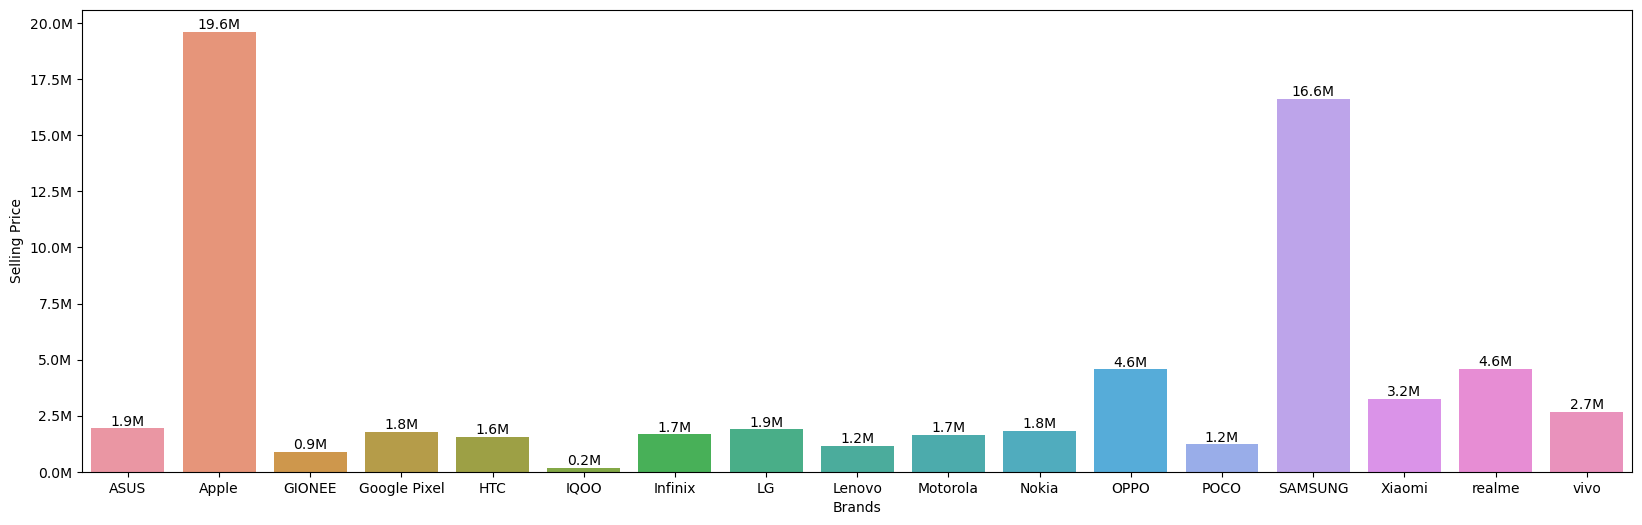

In [18]:
a1 =data.groupby('Brands')['Selling Price'].sum().reset_index()

plt.figure(figsize=(20, 6))

bx = sns.barplot(x = 'Brands', y= 'Selling Price', data = a1)


from matplotlib.ticker import FuncFormatter

def y_format(x,_):
    return f"{x/1000_000:.1f}M"

bx.yaxis.set_major_formatter(FuncFormatter(y_format))

for i in bx.containers:
    bx.bar_label(i, fmt = lambda x: f"{x/1000_000:.1f}M")
plt.show()

# KPI-2: Max Discount on Brands

In [19]:
data.head()

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000
5,GIONEE,L800,Black,8 MB,16 MB,Yes,4.0,2199,2199,GIONEE L800,0,0.000000


In [20]:
ax = data.groupby('Brands',)['Discount'].max().reset_index()

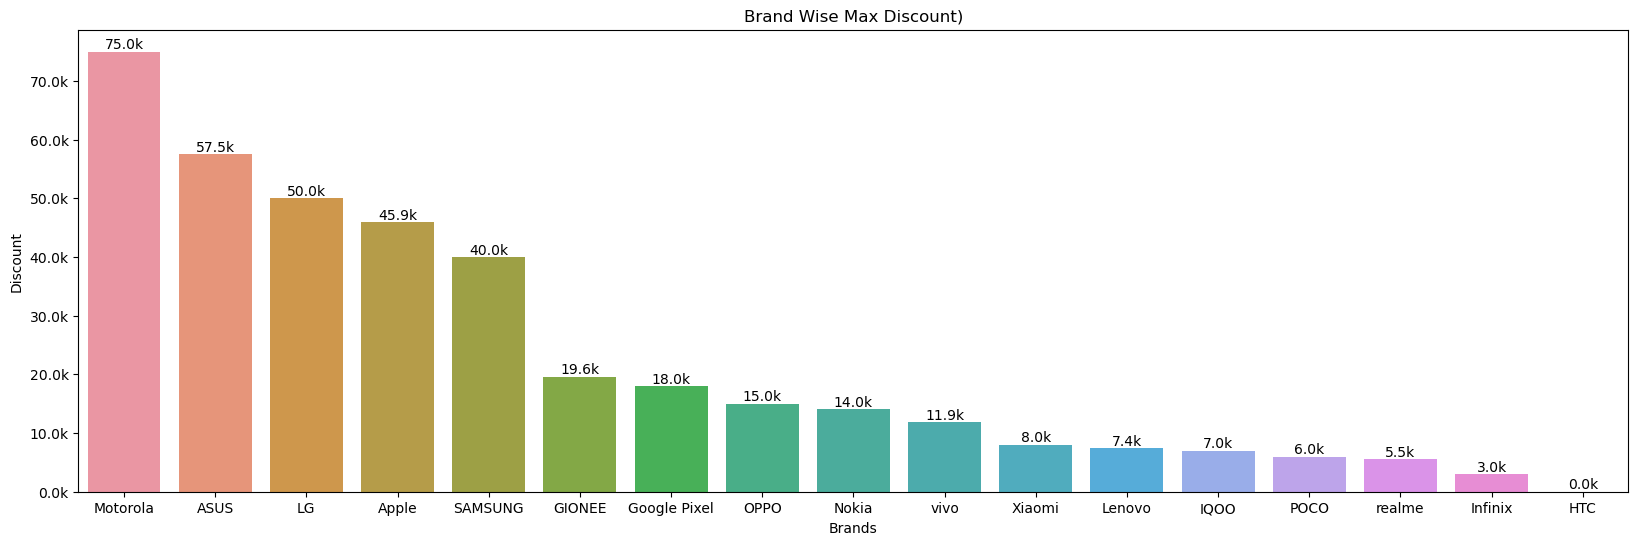

In [21]:
ax = data.groupby('Brands',)['Discount'].max().reset_index().sort_values(by = 'Discount', ascending = False)

plt.figure(figsize=(20, 6))



bx = sns.barplot(x = 'Brands', y= 'Discount', data = ax)


from matplotlib.ticker import FuncFormatter

def y_format(x,_):
    return f"{x/1000:.1f}k"

bx.yaxis.set_major_formatter(FuncFormatter(y_format))

for i in bx.containers:
    bx.bar_label(i, fmt = lambda x: f"{x/1000:.1f}k")

plt.title('Brand Wise Max Discount)')
plt.show()

In [22]:
data.head()

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000
5,GIONEE,L800,Black,8 MB,16 MB,Yes,4.0,2199,2199,GIONEE L800,0,0.000000


# KPI-3: Discount wise Top 5 Phones

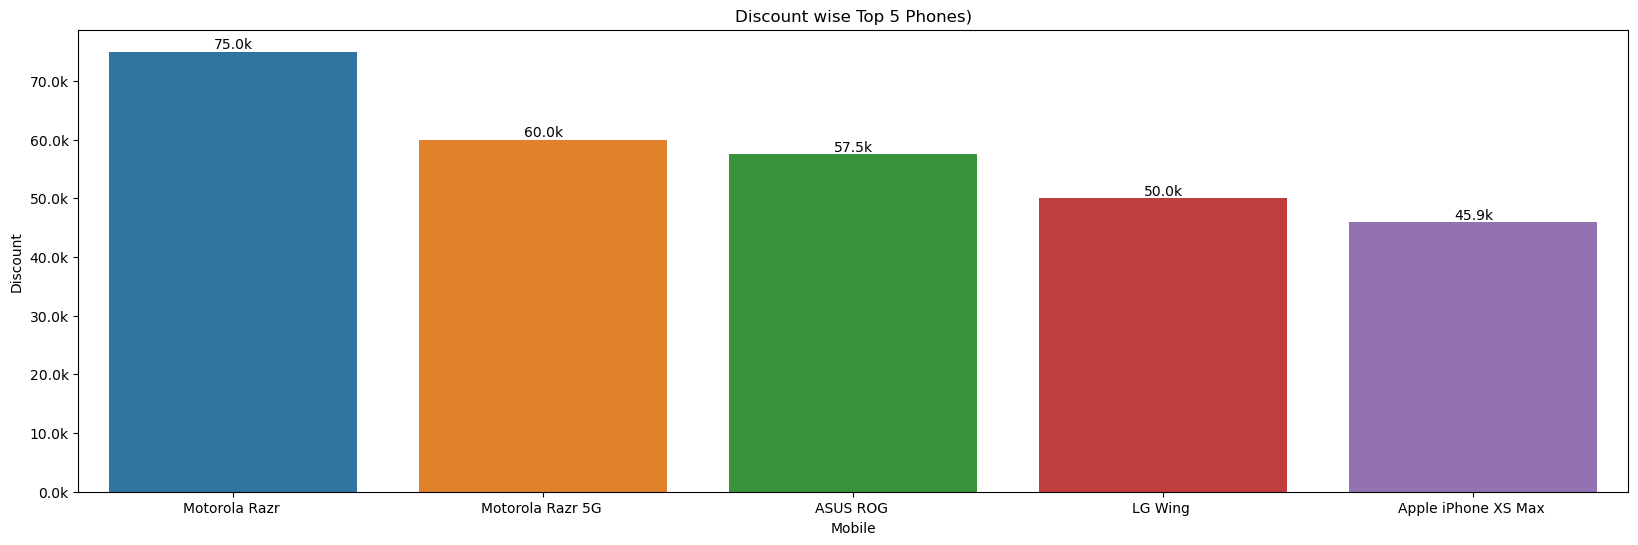

In [23]:
ax = data.groupby('Mobile',)['Discount'].max().reset_index().sort_values(by = 'Discount', ascending = False).head(5)

plt.figure(figsize=(20, 6))



bx = sns.barplot(x = 'Mobile', y= 'Discount', data = ax)


from matplotlib.ticker import FuncFormatter

def y_format(x,_):
    return f"{x/1000:.1f}k"

bx.yaxis.set_major_formatter(FuncFormatter(y_format))

for i in bx.containers:
    bx.bar_label(i, fmt = lambda x: f"{x/1000:.1f}k")

plt.title('Discount wise Top 5 Phones)')
plt.show()

# KPI-4: Brand wise overall Rating

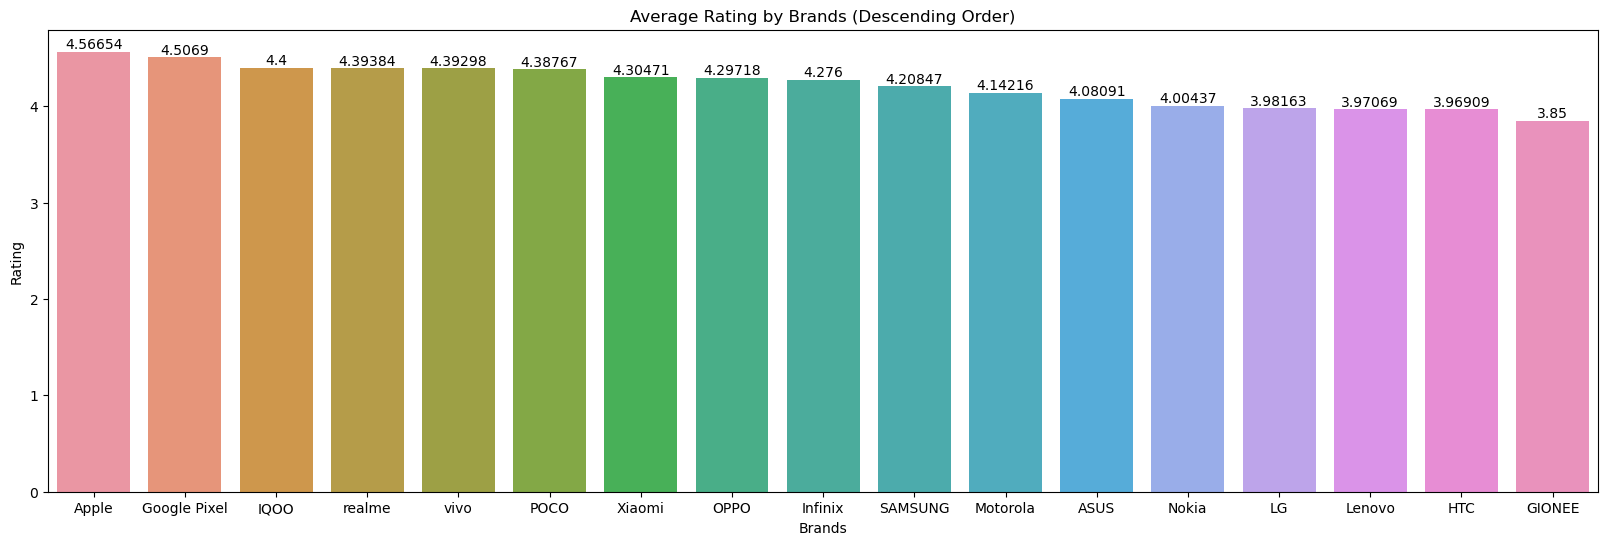

In [24]:
ax = data.groupby('Brands').mean('Rating').reset_index().sort_values(by = 'Rating', ascending = False)
plt.figure(figsize=(20, 6))



bx = sns.barplot(x = 'Brands', y= 'Rating', data = ax)

for i in bx.containers:
    bx.bar_label(i)
    
plt.title('Average Rating by Brands (Descending Order)')
plt.show()

# KPI-5: 5* Rating wise Top 5 Phones

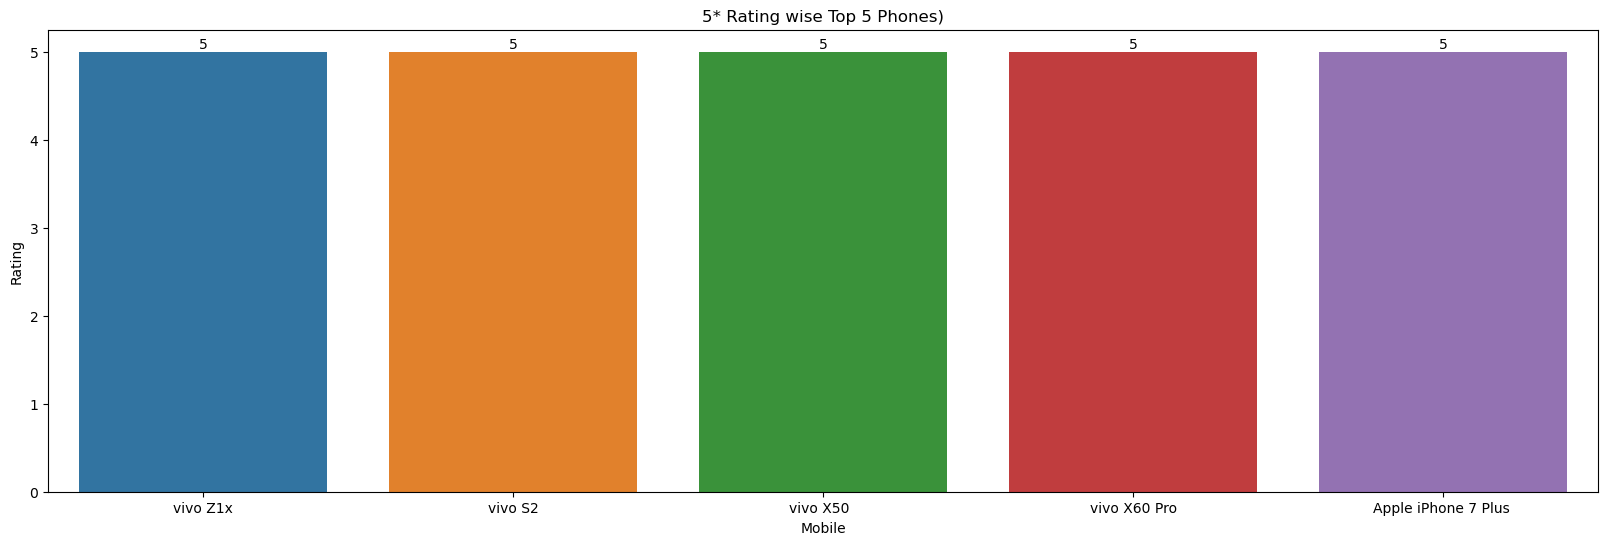

In [25]:
ax = data.groupby('Mobile').max('Rating').reset_index().sort_values(by = 'Rating', ascending = False).head(5)
plt.figure(figsize=(20, 6))



bx = sns.barplot(x = 'Mobile', y= 'Rating', data = ax)

for i in bx.containers:
    bx.bar_label(i)
    
plt.title('5* Rating wise Top 5 Phones)')
plt.show()

In [26]:
data[data['Rating']==5]

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
247,vivo,X50,Frost Blue,8 GB,256 GB,Yes,5.0,44990,44990,vivo X50,0,0.0
1446,vivo,Z1x,Phantom Purple,6 GB,64 GB,Yes,5.0,19990,19990,vivo Z1x,0,0.0
1655,vivo,X60 Pro,Shimmer Blue,12 GB,256 GB,Yes,5.0,48780,48780,vivo X60 Pro,0,0.0
2242,SAMSUNG,SM-B310EZDDINS,Black,100 MB,100 MB,Yes,5.0,1949,1949,SAMSUNG SM-B310EZDDINS,0,0.0
2483,Apple,iPhone 7 Plus,Red,3 GB,256 GB,Yes,5.0,85400,85400,Apple iPhone 7 Plus,0,0.0
2879,vivo,S2,Diamond Black,4 GB,128 GB,Yes,5.0,19990,19990,vivo S2,0,0.0


# KPI-6: Brand wise Max. Selling Price of Mobile Phone

In [27]:
data.head()

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000
5,GIONEE,L800,Black,8 MB,16 MB,Yes,4.0,2199,2199,GIONEE L800,0,0.000000


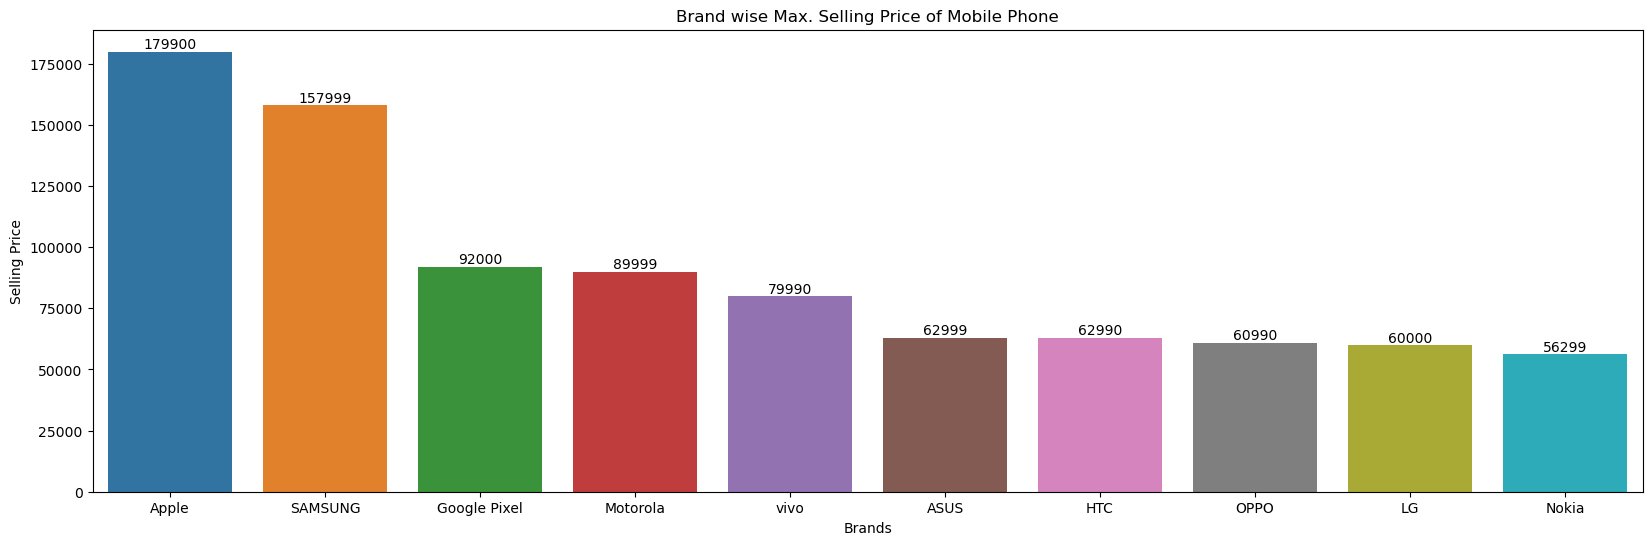

In [28]:
ax = data.groupby('Brands').max().sort_values(by = 'Selling Price', ascending = False).head(10).reset_index()

plt.figure(figsize=(20, 6))



bx = sns.barplot(x = 'Brands', y= 'Selling Price', data = ax,)

for i in bx.containers:
    bx.bar_label(i)
    
plt.title('Brand wise Max. Selling Price of Mobile Phone')
plt.show()

In [29]:
ax = data.groupby('Brands').max().sort_values(by = 'Selling Price', ascending = False).head(10).reset_index()
ax

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,Apple,iPhone XS Max,Yellow,6 GB,64 GB,Yes,5.0,179900,179900,Apple iPhone XS Max,45901,36.750200
1,SAMSUNG,Z4,black sapphire,8 GB,Expandable Upto 16 GB,Yes,5.0,157999,189999,SAMSUNG Z4,40000,57.265385
2,Google Pixel,XL,White,6 GB,64 GB,Yes,4.6,92000,92000,Google Pixel XL,17990,59.986662
3,Motorola,Z2 Play,White,8 GB,8 GB,Yes,4.4,89999,149999,Motorola Z2 Play,75000,66.668148
4,vivo,Z1x,Titanium Sapphire,8 GB,64 GB,Yes,5.0,79990,84990,vivo Z1x,11891,36.044256
5,ASUS,Zenfone Zoom,Yellow,8 GB,8 GB,Yes,4.6,62999,83999,ASUS Zenfone Zoom,57500,68.453196
6,HTC,Wildfire X,White Birch,6 GB,8 GB,Yes,4.7,62990,62990,HTC Wildfire X,0,0.000000
7,OPPO,Rohit Sharma Limited Edition,White,8 GB,64 GB,Yes,4.6,60990,60990,OPPO Rohit Sharma Limited Edition,15000,50.016672
8,LG,X Screen K500I,midnight blue,8 GB,8 GB,Yes,4.5,60000,80000,LG X Screen K500I,50001,62.501250
9,Nokia,XR 20,Yellow,8 MB,Expandable Upto 32 GB,Yes,4.4,56299,56299,Nokia XR 20,14028,64.285714


# KPI-7: Selling Price wise Top 5 phones

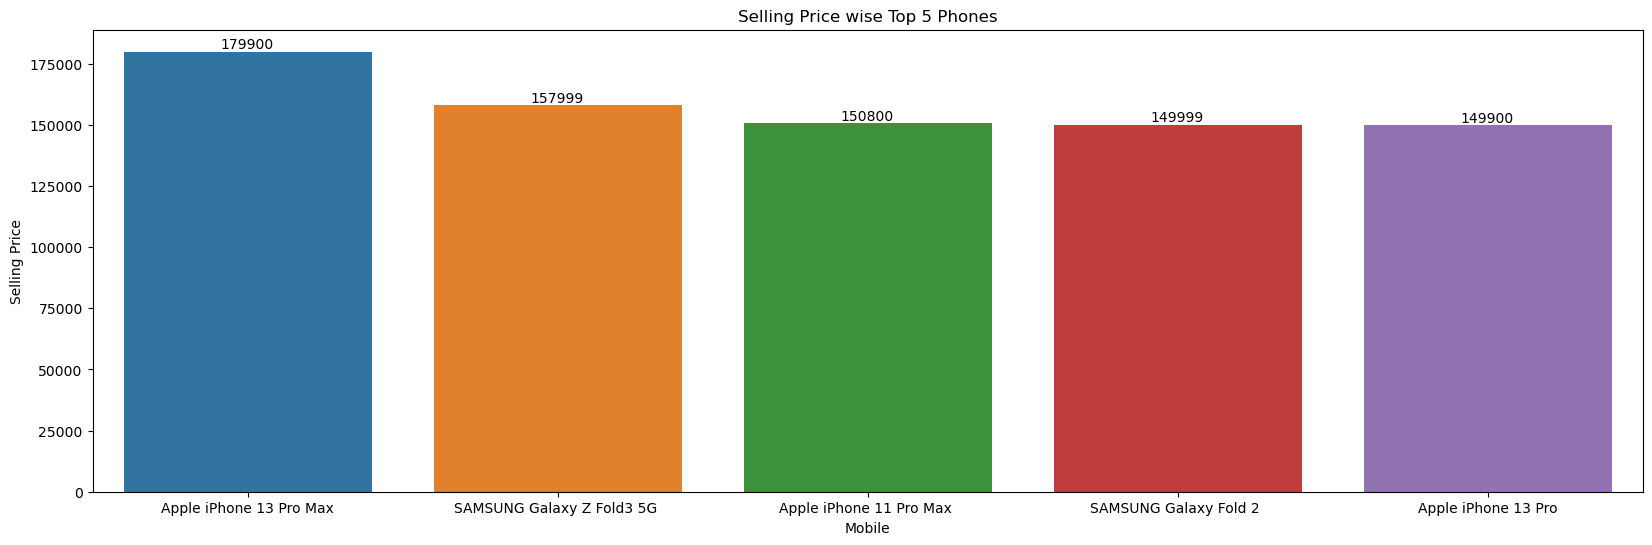

In [30]:
ax = data.groupby('Mobile').max().sort_values(by = 'Selling Price', ascending = False).head(5).reset_index()

plt.figure(figsize=(20, 6))



bx = sns.barplot(x = 'Mobile', y= 'Selling Price', data = ax,)

for i in bx.containers:
    bx.bar_label(i)
    
plt.title('Selling Price wise Top 5 Phones')
plt.show()

# KPI-8: Some Other kpis

In [31]:
# Total Number of Brands

In [32]:
ax = data['Brands'].nunique()
ax

17

In [33]:
# Total Number of Phone sale by Brands

In [34]:
ax = data['Brands'].value_counts().reset_index()
ax.columns = ['Brands', 'Total Sales']
ax

,Brands,Total Sales
0,SAMSUNG,673
1,realme,276
2,Apple,257
3,OPPO,248
4,Xiaomi,191
5,Nokia,183
6,Infinix,150
7,GIONEE,126
8,Lenovo,116
9,vivo,114
